In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')


In [2]:
data1 = pd.read_excel("C:/Users/jys72/Desktop/공모전/한국남동발전_대기오염물질배출농도.xlsx")
data2 = pd.read_excel("C:/Users/jys72/Desktop/공모전/한국남동발전_대기오염물질배출농도(일평균).xlsx")

In [3]:
data1['일자'] = pd.to_datetime(data1['일자'].astype(str) + '01', format='%Y%m%d', errors='coerce')
data1 = data1[(data1['일자'] >= '2023-01-01') & (data1['일자'] <= '2024-12-31')]

In [4]:
data1

,사업소,호기,일자,황산화물(ppm)기준,황산화물(ppm)평균,질소산화물(ppm)기준,질소산화물(ppm)평균,먼지(㎎/S㎥)기준,먼지(㎎/S㎥)평균
0,삼천포발전본부,#1~4호기,2024-12-01,70.0,14.1,140.0,32.0,25.0,2.8
1,삼천포발전본부,#5~6호기,2024-12-01,140.0,9.5,140.0,1.4,25.0,0.8
2,영동에코발전본부,#1~2호기,2024-12-01,100.0,9.2,320.0,23.0,25.0,1.2
3,영흥발전본부,#1~2호기,2024-12-01,45.0,1.7,55.0,9.9,20.0,4.2
4,영흥발전본부,#3~4호기,2024-12-01,25.0,16.1,15.0,12.0,5.0,1.5
...,...,...,...,...,...,...,...,...,...
142,여수발전본부,#2호기,2023-01-01,50.0,1.3,50.0,19.0,10.0,1.7
143,영동에코발전본부,#1~2호기,2023-01-01,100.0,1.2,320.0,24.6,25.0,2.3
144,영흥발전본부,#1~2호기,2023-01-01,45.0,1.6,55.0,9.7,20.0,4.9
145,영흥발전본부,#3~4호기,2023-01-01,25.0,14.8,15.0,11.8,5.0,1.6


In [9]:
data2['일자'] = pd.to_datetime(data2['일자'].astype(str), format='%Y%m%d', errors='coerce')
data2 = data2[(data2['일자'] >= '2023-01-01') & (data2['일자'] <= '2024-12-31')]

In [11]:
data2

,사업소,호기,일자,SOX,NOX,먼지,산소,유량,온도
4341,분당,1호기,2024-12-31,NaN,6.76,NaN,15.38,52558.65,124.67
4342,분당,2호기,2024-12-31,NaN,3.86,NaN,20.90,82.73,16.32
4343,분당,3호기,2024-12-31,NaN,8.07,NaN,15.22,69124.62,123.12
4344,분당,4호기,2024-12-31,NaN,3.47,NaN,20.85,109.42,20.09
4345,분당,5호기,2024-12-31,NaN,8.09,NaN,15.66,82712.37,108.17
...,...,...,...,...,...,...,...,...,...
23238,영흥,4호기,2023-01-01,21.53,97.49,137.92,20.90,7.18,1.25
23239,영흥,5호기,2023-01-01,5.82,9.64,2.64,5.86,205956.66,93.10
23240,영흥,6호기,2023-01-01,10.00,9.90,1.92,4.73,203659.54,91.33
23241,여수,-,2023-01-01,0.00,11.79,19.91,16.55,17405.50,55.82


In [21]:
print(data1.isnull().sum())

사업소             0
호기              0
일자              0
황산화물(ppm)기준     0
황산화물(ppm)평균     0
질소산화물(ppm)기준    0
질소산화물(ppm)평균    0
먼지(㎎/S㎥)기준      0
먼지(㎎/S㎥)평균      0
dtype: int64


In [15]:
data1 = data1.reset_index(drop=True)

In [17]:
data1

,사업소,호기,일자,황산화물(ppm)기준,황산화물(ppm)평균,질소산화물(ppm)기준,질소산화물(ppm)평균,먼지(㎎/S㎥)기준,먼지(㎎/S㎥)평균
0,삼천포발전본부,#1~4호기,2024-12-01,70.0,14.1,140.0,32.0,25.0,2.8
1,삼천포발전본부,#5~6호기,2024-12-01,140.0,9.5,140.0,1.4,25.0,0.8
2,영동에코발전본부,#1~2호기,2024-12-01,100.0,9.2,320.0,23.0,25.0,1.2
3,영흥발전본부,#1~2호기,2024-12-01,45.0,1.7,55.0,9.9,20.0,4.2
4,영흥발전본부,#3~4호기,2024-12-01,25.0,16.1,15.0,12.0,5.0,1.5
...,...,...,...,...,...,...,...,...,...
142,여수발전본부,#2호기,2023-01-01,50.0,1.3,50.0,19.0,10.0,1.7
143,영동에코발전본부,#1~2호기,2023-01-01,100.0,1.2,320.0,24.6,25.0,2.3
144,영흥발전본부,#1~2호기,2023-01-01,45.0,1.6,55.0,9.7,20.0,4.9
145,영흥발전본부,#3~4호기,2023-01-01,25.0,14.8,15.0,11.8,5.0,1.6


In [19]:
data1.fillna(data1.mean(numeric_only=True), inplace=True)
data1

,사업소,호기,일자,황산화물(ppm)기준,황산화물(ppm)평균,질소산화물(ppm)기준,질소산화물(ppm)평균,먼지(㎎/S㎥)기준,먼지(㎎/S㎥)평균
0,삼천포발전본부,#1~4호기,2024-12-01,70.0,14.1,140.0,32.0,25.0,2.8
1,삼천포발전본부,#5~6호기,2024-12-01,140.0,9.5,140.0,1.4,25.0,0.8
2,영동에코발전본부,#1~2호기,2024-12-01,100.0,9.2,320.0,23.0,25.0,1.2
3,영흥발전본부,#1~2호기,2024-12-01,45.0,1.7,55.0,9.9,20.0,4.2
4,영흥발전본부,#3~4호기,2024-12-01,25.0,16.1,15.0,12.0,5.0,1.5
...,...,...,...,...,...,...,...,...,...
142,여수발전본부,#2호기,2023-01-01,50.0,1.3,50.0,19.0,10.0,1.7
143,영동에코발전본부,#1~2호기,2023-01-01,100.0,1.2,320.0,24.6,25.0,2.3
144,영흥발전본부,#1~2호기,2023-01-01,45.0,1.6,55.0,9.7,20.0,4.9
145,영흥발전본부,#3~4호기,2023-01-01,25.0,14.8,15.0,11.8,5.0,1.6


In [23]:
data1['사업소'].value_counts()

사업소
영흥발전본부      57
삼천포발전본부     38
여수발전본부      22
영동에코발전본부    19
분당발전본부      11
Name: count, dtype: int64

In [25]:
data1['사업소코드'] = data1['사업소'].astype('category').cat.codes
data1['호기코드'] = data1['호기'].astype('category').cat.codes

In [29]:
data1['SO2_비율'] = data1['황산화물(ppm)평균'] / data1['황산화물(ppm)기준']
data1['먼지_비율'] = data1['먼지(㎎/S㎥)평균'] / data1['먼지(㎎/S㎥)기준']

In [49]:
features = [
    '황산화물(ppm)기준', '황산화물(ppm)평균',
    '먼지(㎎/S㎥)기준', '먼지(㎎/S㎥)평균',
    'SO2_비율', '먼지_비율',

]

X = data1[features]
y = data1['질소산화물(ppm)평균']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 4.619571671194631
R² Score: 0.9504131132375252


In [55]:
y_pred

array([21.347     , 18.618     ,  9.37380667,  1.941     ,  2.528     ,
       31.746     ,  2.75      ,  1.645     , 12.631     , 11.52161731,
       20.675     , 19.541     , 20.31      ,  2.602     , 20.045     ,
       33.317     , 32.968     , 18.578     , 19.394     , 35.031     ,
        9.693     , 18.505     , 36.691     , 11.753     ,  9.765     ,
       11.424     , 10.4705    , 19.183     , 10.3       ,  9.576     ])

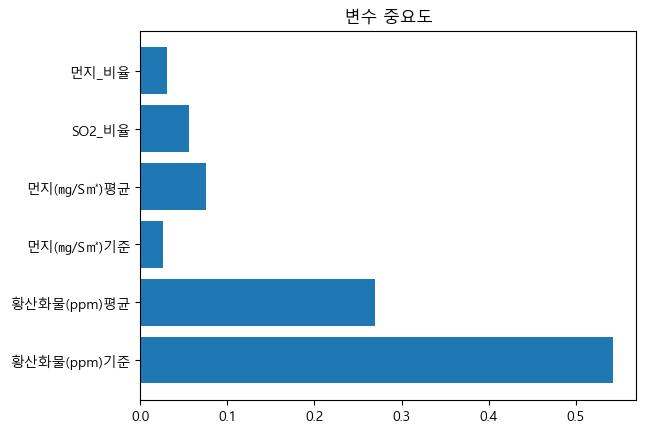

In [57]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.title("변수 중요도")
plt.show()